<table> <tr>
        <td  style="background-color:#ffffff;"><a href="http://qworld.lu.lv/" target="_blank"><img src="../images/qworld.jpg" width="25%" align="left"></a></td>
        <td  style="background-color:#ffffff;vertical-align:bottom;">
            prepared by Abuzer Yakaryilmaz (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

## Qiskit installation and test

- [Check your system](#check)
- [Install qiskit](#install)
- [Tips](#tips)
- [Execute an example quantum program](#test)

<hr id="check">

### Check your system

Check your system, if Qiskit has already been installed:

In [2]:
import qiskit
versions = qiskit.__qiskit_version__
print("The version of Qiskit is",versions['qiskit'])
print()
print("The version of each component:")
for key in versions:
    print(key,"->",versions[key])

The version of Qiskit is 0.23.1

The version of each component:
qiskit-terra -> 0.16.1
qiskit-aer -> 0.7.1
qiskit-ignis -> 0.5.1
qiskit-ibmq-provider -> 0.11.1
qiskit-aqua -> 0.8.1
qiskit -> 0.23.1


**You should be able to see the version number of any library that is already installed in your system.**

<hr id="install">

### Install qiskit

(If you are an experienced user, visit this link: https://qiskit.org/documentation/install.html)

You can install Qiskit by executing the following cell:

In [ ]:
!pip install qiskit[visualization] --user

__*Restart the kernel*__ (check "Kernel" menu) to apply the changes to the current notebook.

<hr id="tips">

### Tips

_Any terminal/shell command can be executed in the notebook cells by putting exclamation mark (!) to the beginning of the command._

_$\rightarrow$ For updating Qiskit version, execute the following command on a code cell_

    !pip install -U qiskit --user
    
_$\rightarrow$ For uninstall Qiskit, execute the following command on a code cell_

    !pip uninstall qiskit

In [ ]:
#!pip install -U qiskit --user
#!pip uninstall qiskit

<hr id="test">

### Execute an example quantum program


1) Create a quantum circuit

In [3]:
# import the objects from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# create a quantum circuit and its register objects
qreg = QuantumRegister(2) # quantum register with two quantum bits
creg = ClassicalRegister(2) # classical register with two classical bit
circuit = QuantumCircuit(qreg,creg) # quantum circuit composed by a quantum register and a classical register

# apply a Hadamard gate to the first qubit
circuit.h(qreg[0])

# set the second qubit to state |1>
circuit.x(qreg[1])

# apply CNOT(first_qubit,second_qubit)
circuit.cx(qreg[0],qreg[1])

# measure the both qubits
circuit.measure(qreg,creg)

print("The execution of the cell was completed, and the circuit was created :)")

The execution of the cell was completed, and the circuit was created :)


2) Draw the circuit

_Run the cell once more if the figure is not shown_

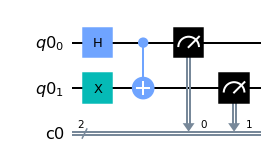

In [4]:
# draw circuit 
circuit.draw(output='mpl')

# the output will be a "matplotlib.Figure" object

3) Execute the circuit 1024 times in the local simulator and print the observed the outcomes

In [19]:
## execute the circuit 1024 times
job = execute(circuit,Aer.get_backend('qasm_simulator'),shots=1024)
# get the result
counts = job.result().get_counts(circuit)
print(counts)

{'01': 502, '10': 522}
